I file video devono essere inseriti nella cartella 'video'.
Il nome del file deve comprende una cifra finale univoca.
I file gazedata devono essere inseriti nella cartella 'dataGaze'.
Il nome del file deve avere la stessa cifra del video corrispondente.
I file imudata devono essere inseriti nella cartella 'dataImu'.
Il nome del file deve avere la stessa cifra del video corrispondente.

Il nome inserito è valido.
Quale azione vuoi eseguire:
            1. Riproduzione del video.
            2. Creazione/Visualizzazione del file pupil.csv
            3. Creazione/Visualizzazione dei grafici delle fissazioni
            4. Creazione del file aoi.csv e visualizzazione dei grafici
            5. Visualizzazione dei grafici a barre
            7. reazione/Visualizzazione dei file fixation.csw
            8. Disegna Scanpath
            6. Exit
            
Creazione Scanpath
1920 1080 0 0
Quale azione vuoi eseguire:
            1. Riproduzione del video.
            2. Creazione/Visualizzazi

KeyboardInterrupt: Interrupted by user

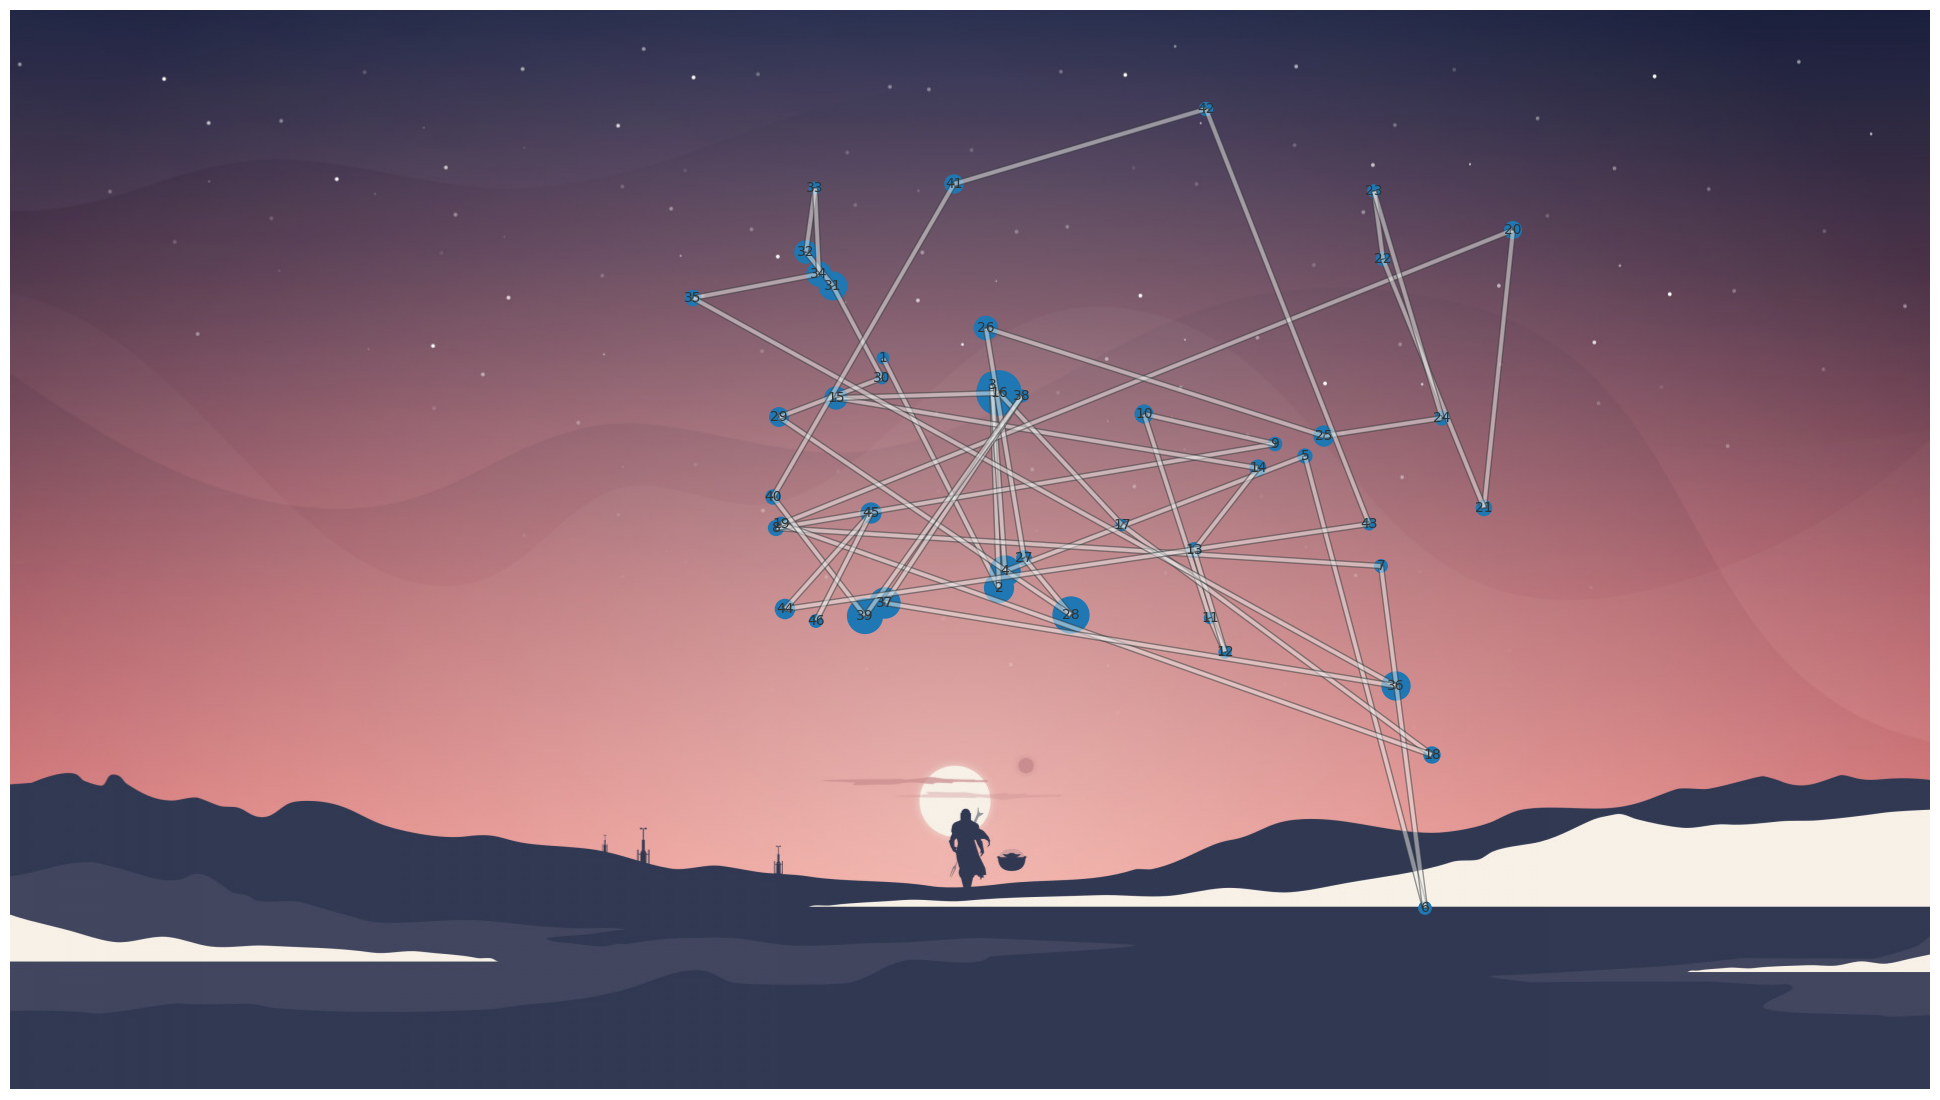

In [1]:
import os

from readVideo import *
from readDataGaze import *
from aoi import *
from barGrafic import *
from scanpath import *
from blinkDetection import *


def main():
    print(
        "I file video devono essere inseriti nella cartella 'video'.\nIl nome del file deve comprende una cifra finale univoca.\n"
        "I file gazedata devono essere inseriti nella cartella 'dataGaze'.\nIl nome del file deve avere la stessa cifra del video corrispondente.\n"
        "I file imudata devono essere inseriti nella cartella 'dataImu'.\nIl nome del file deve avere la stessa cifra del video corrispondente.\n")
    h = input("Digita 's' per continuare:\n")
    while h=='s':

        dirImg = os.path.abspath(os.getcwd()) + '\image'
        for f in os.listdir(dirImg):
            os.remove(os.path.join(dirImg, f))


        #Visualizzo i file presenti nella cartella video
        fname = os.path.abspath(os.getcwd())
        pathVideoDir = fname + '\\' + 'video'
        path, dirs, files = next(os.walk(pathVideoDir))
        file = []
        for x in files:
            file.append(x)
        video = input('''Digita il file da riprodurre o digita 'exit' per uscire:\n(Inserire il nome completo del file video)!!!\n%s:\n''' %files)
        pathVideo = 'video\\'+video

        # Controllo se l'input inserito corrisponde ad un file video esistente
        if os.path.isfile(pathVideo):

            strSplit = video.split('.')
            Numb = ''.join((ch if ch in '0123456789' else ' ') for ch in strSplit[0])
            strNumb =[int(i) for i in Numb.split()]
            strNumb.reverse()
            char = strNumb[0]

            print("Il nome inserito è valido.")
            resImage(video, char)
            while True:
                # Controllo nella cartella 'image' quanti file .png ci sono del video selezionato
                # e restituisco il numero delle immagini
                fname = os.path.abspath(os.getcwd())
                pathImageDir = fname + '\image'
                path, dirs, files = next(os.walk(pathImageDir))
                file_count = 0
                for x in files:
                    file_count += 1
                print('''Quale azione vuoi eseguire:
            1. Riproduzione del video.
            2. Creazione/Visualizzazione del file pupil.csv
            3. Creazione/Visualizzazione dei grafici delle fissazioni
            4. Creazione del file aoi.csv e visualizzazione dei grafici
            5. Visualizzazione dei grafici a barre
            7. Creazione/Visualizzazione dei file fixation.csv
            8. Disegna Scanpath
            9. Creazione del file blinkDetected.csv
            6. Exit
            ''')

                # L'utente sceglie quale azione voler eseguire
                help = input()

                if help == str(1):
                    streamVideo(video)

                elif help == str(2):
                    print("Visualizzazione e creazione del file pupil.csv")
                    readData(char)

                elif help == str(3):
                    fname = os.path.abspath(os.getcwd())
                    pathImageDir = fname + '\out'
                    path, dirs, files = next(os.walk(pathImageDir))

                    if 'pupil.csv' in files:
                        print("Visualizzazione dei grafici delle fissazioni")
                        print("Verranno mostrate le immagini acquisite dal video scelto con sovraimpresse le fissazioni "
                              "catturate negli intervalli di tempo di ogni cambio scena.")
                        graficFix(file_count, durEachScen(char))
                    else:
                        print("Non esiste nessun file 'pupi.csv', per favore selezionare prima l'opzione 2!")

                elif help == str(4):
                    print("Una area di interesse o AOI è una regione dele fissazioni identiche, per identiche intendiamo piccole distanze tra di loro nello spazio ) "
                          "ed viene utilizzata per estrarre metriche specifiche per quella regione. ")
                    chooseAlgo(durEachScen(char))

                elif help == str(5):
                    chooseGraph(char,durEachScen(char))

                elif help == str(6):
                    print("Eliminazione dei file presenti nella cartella grafic")

                    # Elimino i file della cartella 'grafic'
                    dirGraph = os.path.abspath(os.getcwd())+'\grafic'
                    for f in os.listdir(dirGraph):
                        os.remove(os.path.join(dirGraph,f))
                    dirImg = os.path.abspath(os.getcwd()) + '\image'
                    for f in os.listdir(dirImg):
                        os.remove(os.path.join(dirImg, f))
                    dirOut = os.path.abspath(os.getcwd()) + '\out'
                    for f in os.listdir(dirOut):
                        os.remove(os.path.join(dirOut, f))
                    break

                elif help == str(7):
                    print("Visualizzazione e creazione dei file fixation.csv")
                    print("In media, una fissazione ha una durata che va da un minimo di 100-300 ms a un massimo di 3-4 secondi. ( Tuttavia sono state segnalate fissazioni di durata più lunga)")
                    readData(char)

                elif help == str(8):
                    print("Creazione Scanpath")
                    imagefile = os.path.join("c:/","Users/aless/Pictures","wall.jpg")
                    drawScanpath(imagefile=imagefile,alpha=0.5, savefilename='scanpathfile.jpg')

                elif help == str(9):
                    print("Generazione file blinkDetected.csv")
                    blinkDetect()


                

                else:
                    print("Numero o parola inserita non valida, ritenta: ")

        elif video == 'exit':
            break
        else:
            print("Il file digitato non esiste")

if __name__ == '__main__':
    main()


